### Modelo Segmentación: FCN

**Data**: Imagenes de Fondo de ojo [300] ORIGA.

**Segementación**: Atrofia Peripapilar Alfa y Beta.

**GitHub**: https://github.com/divamgupta/image-segmentation-keras

#### **1.- Cambiar las versiones de librerias instalarlas.**

In [ ]:
!pip install q keras==2.4.3
!pip install tensorflow==2.4.1
!pip install opencv-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Attempting uninstall: keras
    Found existing installation: keras 2.8.0
    Uninstalling keras-2.8.0:
      Successfully uninstalled keras-2.8.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.8.0+zzzcolab20220506162203 requires tf-estimator-nightly==2.8.0.dev2021122109, which is not installed.
tensorflow 2.8.0+zzzcolab20220506162203 requires keras<2.9,>=2.8.0rc0, but you have keras 2.4.3 which is incompatible.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 394.3 MB 12 kB/s 
     |████████████████████████████████| 3.8 MB 44.3 MB/s 
     |████████████████████████████████| 14.8 MB 38.9 MB/s 
     |████████████████████████████████| 2.9 MB 46.6 MB/s 
     |█████

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
! pip install git+https://github.com/divamgupta/image-segmentation-keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/divamgupta/image-segmentation-keras to /tmp/pip-req-build-y2vbwurq
  Running command git clone -q https://github.com/divamgupta/image-segmentation-keras /tmp/pip-req-build-y2vbwurq
     |████████████████████████████████| 3.3 MB 5.3 MB/s 
     |████████████████████████████████| 948 kB 46.6 MB/s 
  Created wheel for keras-segmentation: filename=keras_segmentation-0.3.0-py3-none-any.whl size=34557 sha256=94fc81d212802a6b0298c847378e53b8c7195aa70ce743503a436d4959d1c12e
  Stored in directory: /tmp/pip-ephem-wheel-cache-hurq21gl/wheels/78/73/a2/4ee9fce73985dcc4f889d3d012a4461d58254d0de99197af00
Successfully built keras-segmentation
  Attempting uninstall: imageio
    Found existing installation: imageio 2.4.1
    Uninstalling imageio-2.4.1:
      Successfully uninstalled imageio-2.4.1
  Attempting uninstall: imgaug
    Found existing installation: imgaug 0.2.9
    U

#### **2.- Preprocesamiento**.

Importar Librerias.

In [ ]:
import numpy as np
import os
import re
import scipy as sp 
import scipy.ndimage as ndimage
import math
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import pyplot as plt
import cv2
from google.colab.patches import cv2_imshow
from tqdm import tqdm
import keras
from keras import optimizers
import tensorflow as tf 
from tensorflow.keras.optimizers import Adagrad
from google.colab import files
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from numpy import asarray 
from PIL import Image 
from numpy import asarray 

Cargando imagenes de DRIVE a lista.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Resize de la imagenes

*   Crear las carptas donde se guardaran las imagenes.
*   Abrir carpeta de Data Original.
*   Rezsize.
*   Guardar imagenes para nuevo algoritmo en nuevas carpetas. 




In [ ]:
Entrada_1 = '/content/drive/MyDrive/APP/FCN/Images_test'
Entrada_2 = '/content/drive/MyDrive/APP/FCN/Images_train'
Entrada_3 = '/content/drive/MyDrive/APP/FCN/Segmentation_test'
Entrada_4 = '/content/drive/MyDrive/APP/FCN/Segmentation_train'
Imagenes = []

#--------------  Images_test  ---------------
Direccion_imagenes = Entrada_1 + os.sep 
cant=0
for root, dirnames, filenames in os.walk(Direccion_imagenes):
    for filename in filenames:
          cant=cant+1
          filepath = os.path.join(root, filename)
          img = cv2.imread(filepath)
          img = cv2.resize(img,(608,416))
          cv2.imwrite('/content/drive/MyDrive/APP/FCN/fcn_Img_test/' + filename, img)
          Imagenes.append(img)
          

#--------------  Images_train  ----------------
Direccion_imagenes = Entrada_2 + os.sep 
cant=0
for root, dirnames, filenames in os.walk(Direccion_imagenes):
    for filename in filenames:
          cant=cant+1
          filepath = os.path.join(root, filename)
          img = cv2.imread(filepath)
          img = cv2.resize(img,(608,416))
          cv2.imwrite('/content/drive/MyDrive/APP/FCN/fcn_Img_train/' + filename, img)
          Imagenes.append(img)

#------------- Segmentation_test  ---------------
Direccion_imagenes = Entrada_3 + os.sep 
cant=0
for root, dirnames, filenames in os.walk(Direccion_imagenes):
    for filename in filenames:
          cant=cant+1
          filepath = os.path.join(root, filename)
          img = cv2.imread(filepath)
          img = cv2.resize(img,(608,416))
          cv2.imwrite('/content/drive/MyDrive/APP/FCN/fcn_Seg_test/' + filename, img)
          Imagenes.append(img)
          

#------------- Segmentation_train  ---------------
Direccion_imagenes = Entrada_4 + os.sep 
cant=0
for root, dirnames, filenames in os.walk(Direccion_imagenes):
    for filename in filenames:
          cant=cant+1
          filepath = os.path.join(root, filename)
          img = cv2.imread(filepath)
          img = cv2.resize(img,(608,416))
          cv2.imwrite('/content/drive/MyDrive/APP/FCN/fcn_Seg_train/' + filename, img)
          Imagenes.append(img)


print("Cantidad Imagenes: ",len(Imagenes))

Cantidad Imagenes:  439


#### **3.- Inicializar Modelo.**
Numero de clases igual al valor del pixel mas alto en el componente azul de la imagen.

In [ ]:
from keras_segmentation.models.fcn import fcn_8_vgg

model_2 = fcn_8_vgg(n_classes=255 ,  input_height=416, input_width=608  )

58892288/58889256 [==============================] - 1s 0us/step


Entrenamiento de Modelo

In [ ]:
model_2.train(
    train_images =  "/content/drive/MyDrive/Data/segnet_Img_train/",
    train_annotations = "/content/drive/MyDrive/Data/segnet_Seg_train/",
    checkpoints_path = "/tmp/fcn_8" , epochs=5   
)

Verifying training dataset


100%|██████████| 170/170 [00:31<00:00,  5.47it/s]


Dataset verified! 
Epoch 1/5
512/512 [==============================] - 1534s 3s/step - loss: 2.5575 - accuracy: 0.9588

Epoch 00001: saving model to /tmp/fcn_8.00001
Epoch 2/5
512/512 [==============================] - 1558s 3s/step - loss: 2.3693 - accuracy: 0.9739

Epoch 00002: saving model to /tmp/fcn_8.00002
Epoch 3/5
512/512 [==============================] - 1561s 3s/step - loss: 0.1184 - accuracy: 0.9902

Epoch 00003: saving model to /tmp/fcn_8.00003
Epoch 4/5
512/512 [==============================] - 1511s 3s/step - loss: 191.6377 - accuracy: 0.9583

Epoch 00004: saving model to /tmp/fcn_8.00004
Epoch 5/5
512/512 [==============================] - 1513s 3s/step - loss: 1.8462 - accuracy: 0.9833

Epoch 00005: saving model to /tmp/fcn_8.00005


Cargar Imagen de Test.

In [ ]:
out_1 = model_2.predict_segmentation(
    inp="/content/drive/MyDrive/Data/segnet_Img_test/Im0367_ORIGA_jpg.rf.eb64710d45246b6f4b4e925b4e83583b.jpg",
    out_fname="/tmp/out.png"
)

out_2 = model_2.predict_segmentation(
    inp="/content/drive/MyDrive/Data/segnet_Img_test/Im0376_ORIGA_jpg.rf.0cde0709616d5ff3cc6d9634da57744f.jpg",
    out_fname="/tmp/out.png"
)
out_3 = model_2.predict_segmentation(
    inp="/content/drive/MyDrive/Data/segnet_Img_test/Im0389_ORIGA_jpg.rf.f84ba0d087dad45ca3afba17dda0a119.jpg",
    out_fname="/tmp/out.png"
)
out_4 = model_2.predict_segmentation(
    inp="/content/drive/MyDrive/Data/segnet_Img_test/Im0390_ORIGA_jpg.rf.b4ee969ab9ac8b014cd17803b25c684e.jpg",
    out_fname="/tmp/out.png"
)

Visualizar Imagen Segmentada.

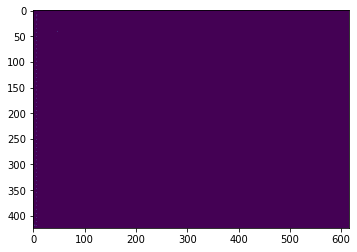

In [ ]:
plt.imshow(out_1)

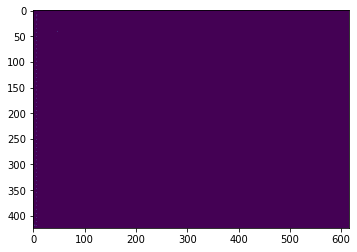

In [ ]:
plt.imshow(out_2)

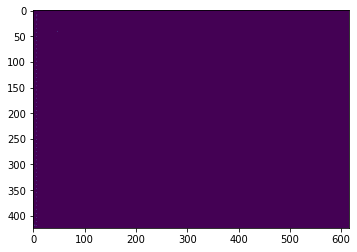

In [ ]:
plt.imshow(out_3)

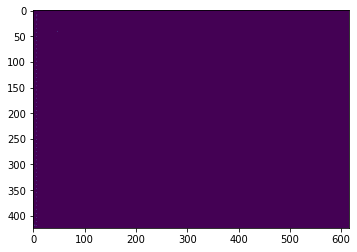

In [ ]:
plt.imshow(out_4)

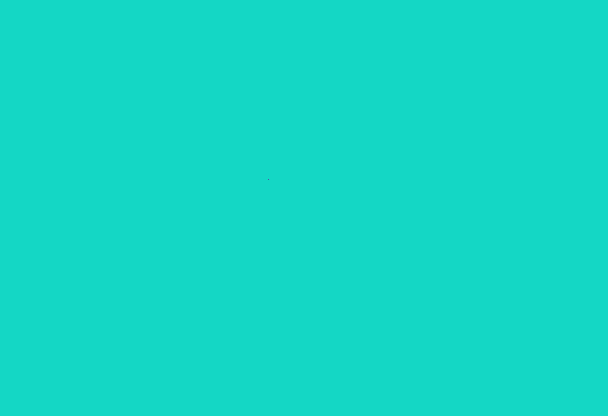

In [ ]:
from IPython.display import Image
Image('/tmp/out.png')

In [ ]:
Clases =[]
for i in range(255):
    clase = str(i)
    Clases.append(clase)
o = model.predict_segmentation(
    inp="/content/drive/MyDrive/APP/FCN/fcn_Img_test/Im0376_ORIGA_jpg.rf.0cde0709616d5ff3cc6d9634da57744f.jpg",
    out_fname="/tmp/out.png" , overlay_img=True, show_legends=True,
    class_names = Clases

)

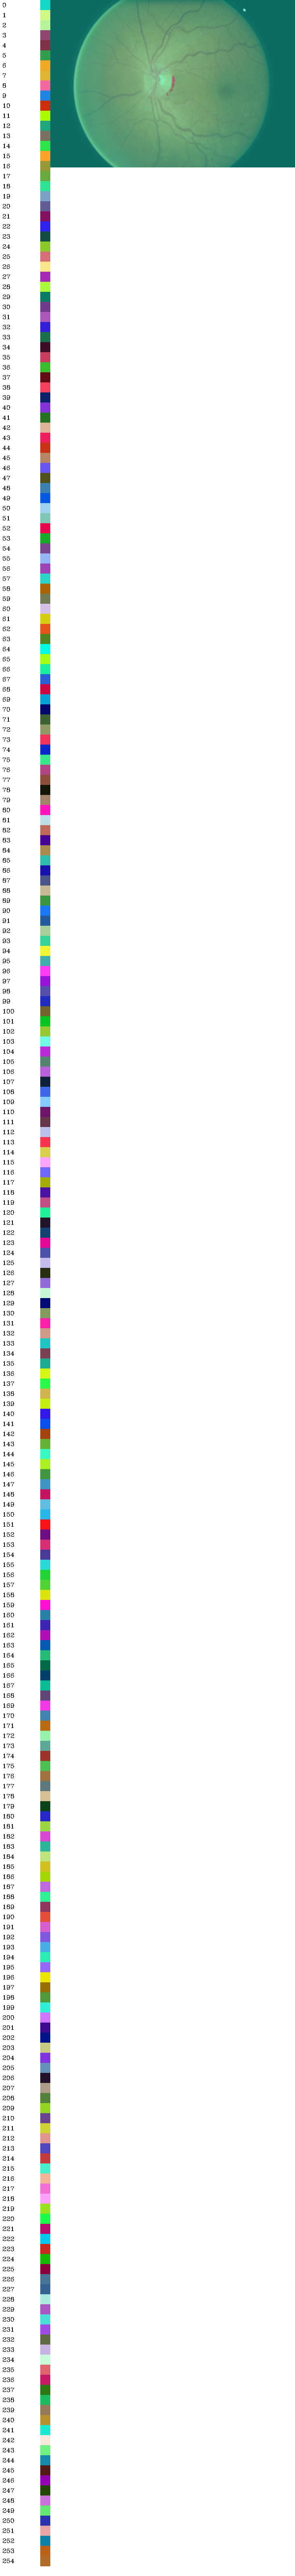

In [ ]:
from IPython.display import Image
Image('/tmp/out.png')